In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

from datafiles import (
    Datafile_VeigaLopez_Mother, Datafile_VeigaLopez_Fetus,
    Datafile_Grandin_Mother_Exp1_ngml, Datafile_Grandin_Mother_Exp2_ngml,
    Datafile_Grandin_Fetus_Exp1_ngml, Datafile_Grandin_Fetus_Exp2_ngml
)

from experiments import (
    VeigaLopezExperiment,
    GrandinExperiment1_Mother_BPSG, GrandinExperiment2_Mother_BPS,
    MultiSCExperiment
)

In [77]:
def plot_subgraph(ax, exp_no, df_no, var_no, y_label, color, ls, lw=None, exp_variable=None, show_obs=True, ylim=None, label=None, params=None):
    experiment, datafiles = calibration_experiments[exp_no]

    if params is not None:
        params = {**param_values, **params}
    else:
        params = param_values.copy()
    sim = experiment.run(params=params)
    
    df = datafiles[df_no]
    variable = df.variables[var_no]
    if exp_variable is None:
        exp_variable = df.inv_mapping[variable]

    x_sim = sim['time']
    y_sim = sim[exp_variable]
    x_obs = df.df['time']
    y_obs = df.df[variable]
    y_obs_err = df.df[variable +'_Sd']
    
    plt.rc('font', family='serif')
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )


    
    ax.plot(sim['time'], sim[exp_variable], color=color, ls=ls, lw=lw, label=label)
        
    if y_label is not None:
        ax.set_ylabel(y_label, fontsize=17)
    ax.set_xlabel('Time [h]', fontsize=17)
    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([-(max(y_obs) + max(y_obs_err))*0.05, (max(y_obs) + max(y_obs_err))*1.05])

        
    # plot observations
    if show_obs:
        ax.errorbar(df.df['time'], df.df[variable], df.df[variable +'_Sd'], color='k', fmt='d', capsize=4, fillstyle='none',  markersize=9)

    if label is not None:
        ax.legend(prop={'size': 16})

def multidosing_means(df, variable):
    means = []
    for day in range(1, 15):
        means.append(df[variable][(df['time']>(day-1)*24) & (df['time']<(day)*24)].mean())
    x = np.linspace(0, 14, num=14, endpoint=True)
    f = interp1d(x, means)
    return f
    
    
def multidosing_plot(sim_multi, sim_single, variable, color, ls, y_label=None, y_lim=None, plot_single=False, means=None, lw=None):
    plt.plot(sim_multi['time']/24, sim_multi[variable], color=color, ls=ls, lw=lw)
    if plot_single:
        plt.plot(sim_single['time']/24, sim_single[variable], color=color, ls='dashed', lw=lw)
    
    if means is not None:
        plt.plot(np.linspace(0,14, num=100, endpoint=True), means(np.linspace(0,14, num=100, endpoint=True)), color='black', lw=lw)
        
    
    if y_label is not None:
        plt.ylabel(y_label, fontsize=17)
    plt.xlabel('Time [d]', fontsize=17)
    if y_lim is not None:
        plt.ylim(y_lim)

In [78]:
calibration_experiments = [
    [VeigaLopezExperiment(end=72), [
        Datafile_VeigaLopez_Fetus(),
        Datafile_VeigaLopez_Mother()
    ]],
    [GrandinExperiment1_Mother_BPSG(end=72), [
        Datafile_Grandin_Mother_Exp1_ngml(drop=['BPS', 'BPS-d8', 'BPSG-d8']),
        Datafile_Grandin_Fetus_Exp1_ngml(drop=['BPS', 'BPSG','BPSG-d8'])
    ]],
    [GrandinExperiment2_Mother_BPS(end=72), [
        Datafile_Grandin_Mother_Exp2_ngml(drop=['BPS-d8', 'BPSG-d8']),
        Datafile_Grandin_Fetus_Exp2_ngml(drop=['BPS', 'BPSG', 'BPS-d8'])
    ]],
]

In [79]:
param_values ={
    'FSC': 0.43,
    'KGBLel': 0.06066256807569975,
    'Ka1': 0.18345209225570114,
    'Kd_fetus': 2.8044447477536185,
    'Kel': 0.0,
    'Kel_blood': 0.023365379621425143,
    'Kelconj': 0.0,
    'Kelconj_blood': 4.0931841034206835,
    'Km_mg_L': 4.7901339926875135,
    'Km_mg_L_fetus': 2.73990548423766,
    'Kt': 0.0,
    'PF': 0.030620951927360442,
    'PFconj': 0.002685921550910943,
    'PK': 0.016989477163000102,
    'PKconj': 0.00490330001316198,
    'PL': 2.3,
    'PLconj': 2.46979888076927955,
    'PPL': 0.10623216806189863,
    'PPLconj': 0.002005018349049208,
    'PR': 0.012981032403390332,
    'PR_fetus': 0.005174848904783624,
    'PRconj': 0.0018998413392744625,
    'PRconj_fetus': 0.16804354072787323,
    'Vmax_mg_h': 8185.657520723751,
    'Vmax_mg_h_fetus': 1000.257781100274,             
    'k1t': 0.075,
    'k2t': 0.11281237811570247
}

# Figure 3

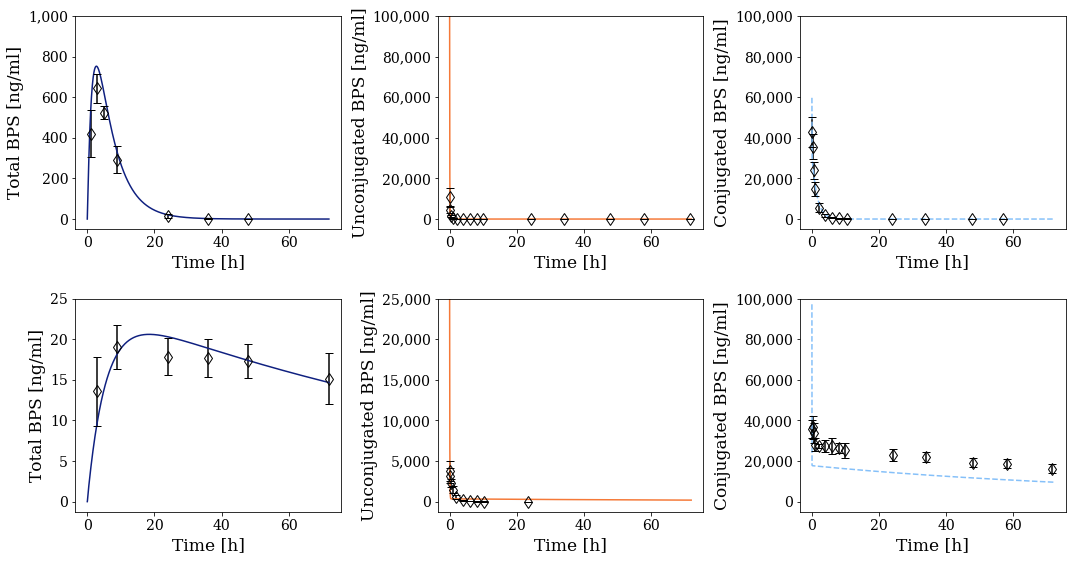

In [80]:
# Figure 3

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))


plot_subgraph(ax1, 0, 1, 0, 'Total BPS [ng/ml]', '#0f2080', 'solid', ylim=[-50, 1000])
plot_subgraph(ax2, 2, 0, 0, 'Unconjugated BPS [ng/ml]', color='#f57938', ls='solid', ylim=[-5000, 100000])
plot_subgraph(ax3, 1, 0, 0, 'Conjugated BPS [ng/ml]', color='#85c0F9', ls='dashed', ylim=[-5000, 100000])

plot_subgraph(ax4, 0, 0, 0, 'Total BPS [ng/ml]', '#0f2080', 'solid', ylim=[-1.25, 25])
plot_subgraph(ax5, 1, 1, 0, 'Unconjugated BPS [ng/ml]', color='#f57938', ls='solid', ylim=[-1250, 25000])
plot_subgraph(ax6, 2, 1, 0, 'Conjugated BPS [ng/ml]', color='#85c0F9', ls='dashed', ylim=[-5000, 100000])


fig.tight_layout()
fig.savefig('../figures/FIG_3_bps_calibration_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 3 - insets

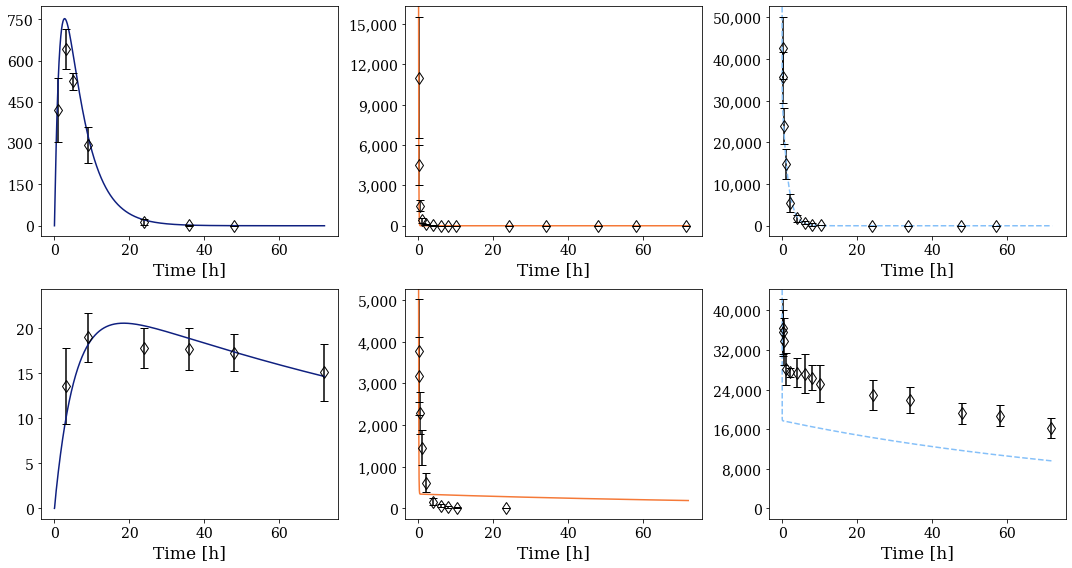

In [81]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')



plot_subgraph(ax1, 0, 1, 0, None, '#0f2080', 'solid')
plot_subgraph(ax2, 2, 0, 0, None, color='#f57938', ls='solid')
plot_subgraph(ax3, 1, 0, 0, None, color='#85c0F9', ls='dashed')

plot_subgraph(ax4, 0, 0, 0, None, '#0f2080', 'solid')
plot_subgraph(ax5, 1, 1, 0, None, color='#f57938', ls='solid')
plot_subgraph(ax6, 2, 1, 0, None, color='#85c0F9', ls='dashed')


fig.tight_layout()
fig.savefig('../figures/FIG_3_INSET_bps_calibration_ngml.svg', format='svg', dpi=1200)
plt.show()

# Supplementary Figure 2

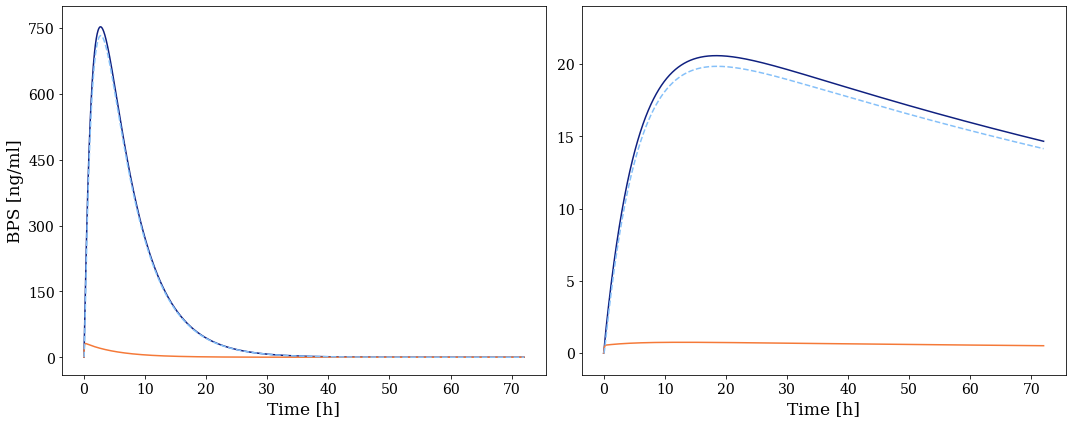

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')



plot_subgraph(ax1, 0, 1, 0, 'BPS [ng/ml]', '#0f2080', 'solid', show_obs=False, ylim=[-40, 799])
plot_subgraph(ax1, 0, 1, 0, None, exp_variable='CA_ngml', color='#f57938', ls='solid', ylim=[-40, 799], show_obs=False)
plot_subgraph(ax1, 0, 1, 0, None, exp_variable='CAconj_ngml', color='#85c0F9', ls='dashed', ylim=[-40, 799], show_obs=False)

plot_subgraph(ax2, 0, 0, 0, None, '#0f2080', 'solid', show_obs=False,ylim=[-1.5, 24])
plot_subgraph(ax2, 0, 0, 0, None, exp_variable='CEF_ngml', color='#f57938', ls='solid',ylim=[-1.5, 24], show_obs=False)
plot_subgraph(ax2, 0, 0, 0, None, exp_variable='CEFconj_ngml', color='#85c0F9', ls='dashed',ylim=[-1.5, 24], show_obs=False)


fig.tight_layout()
fig.savefig('../figures/FIG_S2_bps_mother_fetus_breakdown_ngml.svg', format='svg', dpi=1200)    
plt.show()

# Supplemental Figure 2 - thicker line

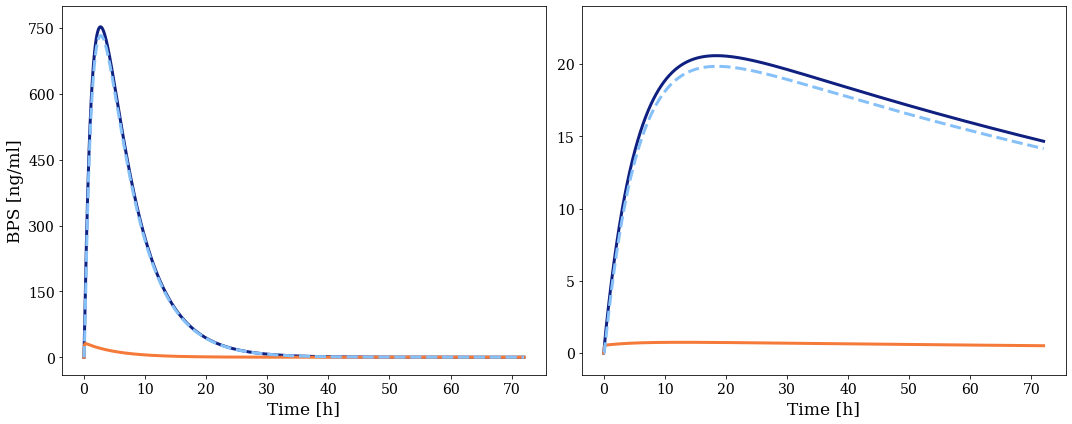

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')



plot_subgraph(ax1, 0, 1, 0, 'BPS [ng/ml]', '#0f2080', 'solid', show_obs=False, ylim=[-40, 799], lw=3)
plot_subgraph(ax1, 0, 1, 0, None, exp_variable='CA_ngml', color='#f57938', ls='solid', show_obs=False,ylim=[-40, 799], lw=3)
plot_subgraph(ax1, 0, 1, 0, None, exp_variable='CAconj_ngml', color='#85c0F9', ls='dashed', show_obs=False,ylim=[-40, 799], lw=3)

plot_subgraph(ax2, 0, 0, 0, None, '#0f2080', 'solid', show_obs=False, ylim=[-1.5, 24], lw=3)
plot_subgraph(ax2, 0, 0, 0, None, exp_variable='CEF_ngml', color='#f57938', ls='solid', show_obs=False, ylim=[-1.5, 24], lw=3)
plot_subgraph(ax2, 0, 0, 0, None, exp_variable='CEFconj_ngml', color='#85c0F9', ls='dashed', show_obs=False, ylim=[-1.5, 24], lw=3)


fig.tight_layout()
fig.savefig('../figures/FIG_S2-thicker_bps_mother_fetus_breakdown_ngml.svg', format='svg', dpi=1200)    
plt.show()

# Supplemental Figure 3

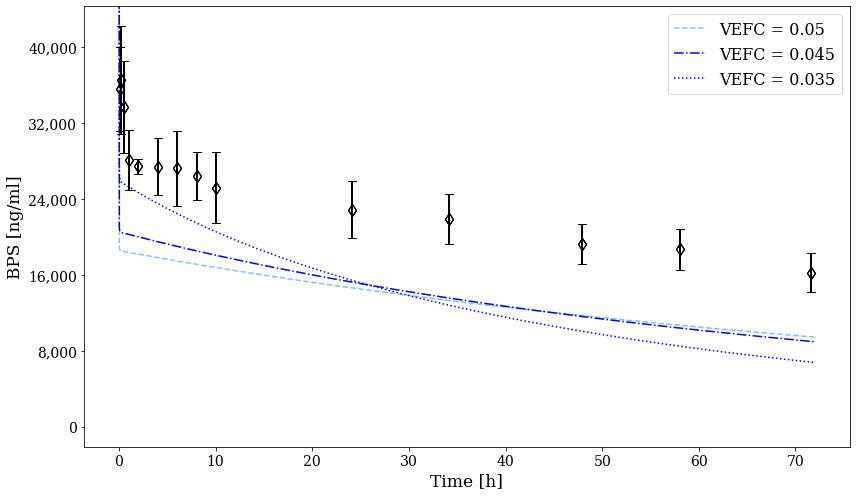

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))

plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='#85c0F9', ls='dashed', label='VEFC = 0.05', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.05})
plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='blue', ls='-.', label='VEFC = 0.045', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.045})
plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='blue', ls=':', label='VEFC = 0.035', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.035})

fig.tight_layout()
fig.savefig('../figures/FIG_S3_bps_fetus_weight_calibration.svg', format='svg', dpi=1200)    
plt.show()

# Supplemental Figure 3 - thicker

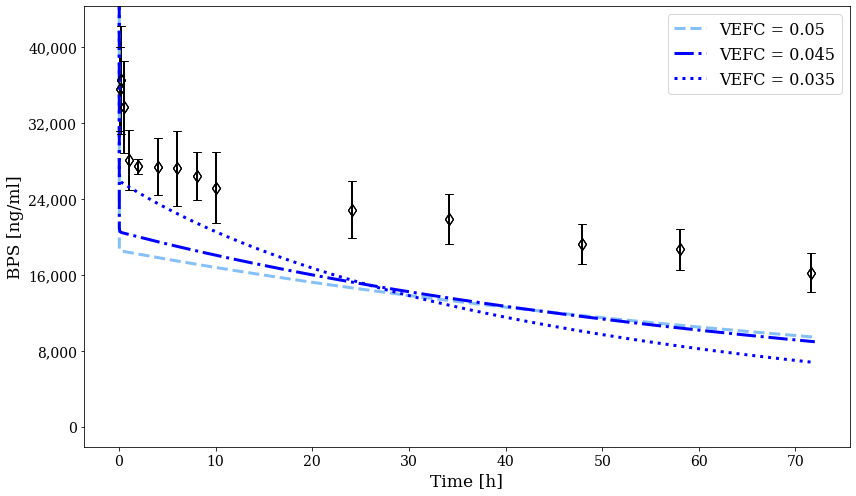

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))

plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='#85c0F9', ls='dashed', label='VEFC = 0.05', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.05}, lw=3)
plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='blue', ls='-.', label='VEFC = 0.045', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.045}, lw=3)
plot_subgraph(ax, 2, 1, 0,  'BPS [ng/ml]', color='blue', ls=':', label='VEFC = 0.035', exp_variable='CEFconj_d8_ngml', params={'VEFC': 0.035}, lw=3)

fig.tight_layout()
fig.savefig('../figures/FIG_S3-thicker_bps_fetus_weight_calibration.svg', format='svg', dpi=1200)    
plt.show()

# Figure 4 Initialization

In [66]:
experiment = MultiSCExperiment(end=336)

param_values['PDOSE'] = 50e-6
param_values['IS_MULTI'] = 0
sim_single = experiment.run(params=param_values)
param_values['IS_MULTI'] = 1
sim_multi = experiment.run(params=param_values)
param_values['IS_MULTI'] = 0
param_values['PDOSE'] = 0


df = pd.DataFrame(sim_multi, columns=sim_multi.colnames)

# Figure 4A

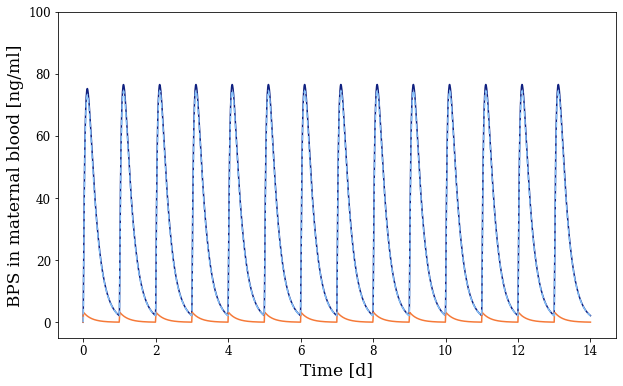

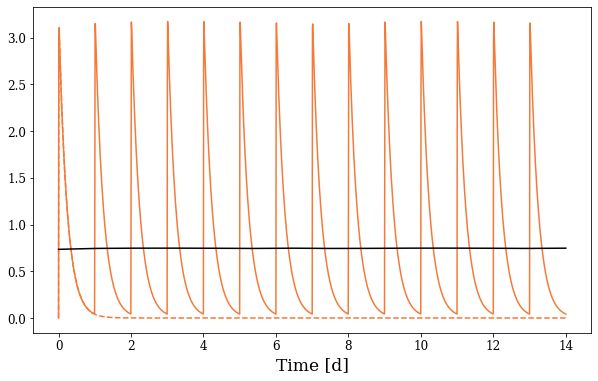

In [98]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CAtotal_ngml', 
    color='#0f2080', ls='solid', 
    y_label='BPS in maternal blood [ng/ml]', 
    y_lim=[-5, 100]
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_ngml', 
    color='#f57938', ls='solid', 
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CAconj_ngml', 
    color='#85c0F9', ls='dashed', 
)
plt.savefig('../figures/FIG_5_A_1_bps_maternal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_ngml', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_ngml')
)
plt.savefig('../figures/FIG_5_A_2_bps_only_maternal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4B

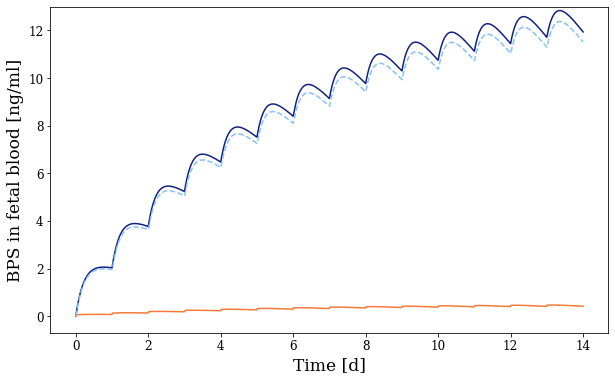

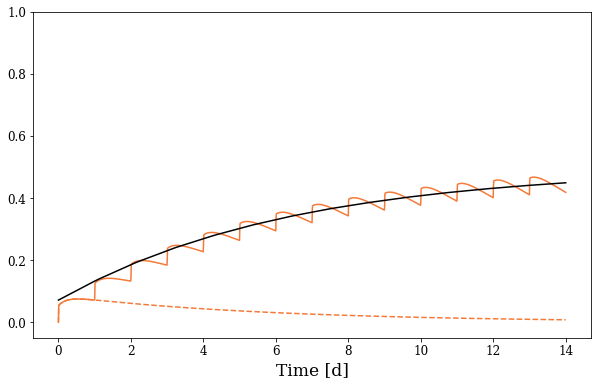

In [101]:
plt.figure(figsize=(10,6))

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEFtotal_ngml', 
    color='#0f2080', ls='solid', 
    y_label='BPS in fetal blood [ng/ml]', 
    y_lim=[-0.7, 13]
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEF_ngml', 
    color='#f57938', ls='solid', 
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEFconj_ngml', 
    color='#85c0F9', ls='dashed', 
)
plt.savefig('../figures/FIG_5_B_1_bps_fetal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEF_ngml', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CEF_ngml'),
    y_lim=[-0.05, 1]
)
plt.savefig('../figures/FIG_5_B_2_bps_only_fetal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4A - thicker

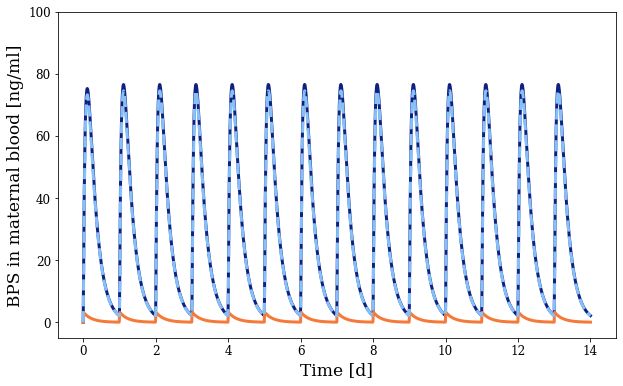

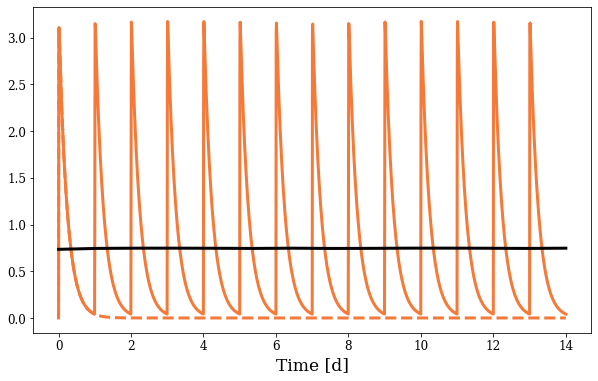

In [97]:
plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CAtotal_ngml', 
    color='#0f2080', ls='solid', 
    y_label='BPS in maternal blood [ng/ml]', 
    y_lim=[-5, 100],
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_ngml', 
    color='#f57938', ls='solid', 
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CAconj_ngml', 
    color='#85c0F9', ls='dashed', 
    lw=3,
)
plt.savefig('../figures/FIG_5_A_1-thicker_bps_maternal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))
multidosing_plot(
    sim_multi, 
    sim_single, 
    'CA_ngml', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CA_ngml'),
    lw=3,
)
plt.savefig('../figures/FIG_5_A_2-thicker_bps_only_maternal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

# Figure 4B - thicker

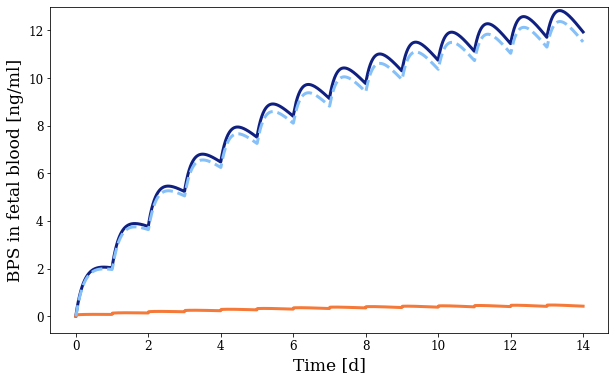

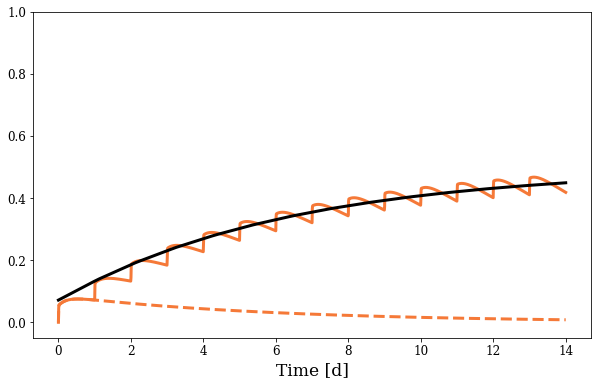

In [95]:
plt.figure(figsize=(10,6))

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEFtotal_ngml', 
    color='#0f2080', ls='solid', 
    y_label='BPS in fetal blood [ng/ml]', 
    y_lim=[-0.7, 13],
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEF_ngml', 
    color='#f57938', ls='solid', 
    lw=3,
)

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEFconj_ngml', 
    color='#85c0F9', ls='dashed', 
    lw=3,
)
plt.savefig('../figures/FIG_5_B_1-thicker_bps_fetal_blood_totals_ngml.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(10,6))

multidosing_plot(
    sim_multi, 
    sim_single, 
    'CEF_ngml', 
    color='#f57938', ls='solid',
    plot_single=True,
    means=multidosing_means(df, 'CEF_ngml'),
    y_lim=[-0.05, 1],
    lw=3,
)
plt.savefig('../figures/FIG_5_B_2-thicker_bps_only_fetal_blood_ngml.svg', format='svg', dpi=1200)
plt.show()

In [71]:
multidosing_means(df, 'CEF_ngml')(np.linspace(0,14, num=100, endpoint=True))

array([0.07141076, 0.08004372, 0.08867668, 0.09730965, 0.10594261,
       0.11457557, 0.12320853, 0.13184149, 0.13998231, 0.14733569,
       0.15468906, 0.16204244, 0.16939582, 0.1767492 , 0.18410258,
       0.19145596, 0.19792654, 0.20413229, 0.21033804, 0.21654379,
       0.22274953, 0.22895528, 0.23516103, 0.24121751, 0.24645302,
       0.25168854, 0.25692405, 0.26215956, 0.26739507, 0.27263059,
       0.2778661 , 0.28266042, 0.28707657, 0.29149271, 0.29590886,
       0.30032501, 0.30474116, 0.3091573 , 0.31357345, 0.31736987,
       0.32111464, 0.32485941, 0.32860418, 0.33234895, 0.33609372,
       0.3398385 , 0.34339806, 0.34654091, 0.34968376, 0.35282661,
       0.35596946, 0.35911231, 0.36225516, 0.36539801, 0.36817368,
       0.37078617, 0.37339866, 0.37601114, 0.37862363, 0.38123611,
       0.3838486 , 0.38643272, 0.38867648, 0.39092024, 0.393164  ,
       0.39540777, 0.39765153, 0.39989529, 0.40213905, 0.40422138,
       0.40611536, 0.40800935, 0.40990334, 0.41179733, 0.41369